In [ ]:
#import thư viện
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(10,5)})
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error

# New Section

In [ ]:
df= pd.read_excel('/content/Vehicle Insurance.xlsx')

# PREPROCESSING & EDA


In [ ]:
df

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2763.519279
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,6979.535903
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,12887.431650
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,7645.861827
4,HB64268,Washington,No,Basic,Bachelor,2011-03-02,Employed,M,43836,Rural,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2813.692575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-10-02,Employed,M,71941,Urban,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,23405.987980
9130,PK87824,California,Yes,Extended,College,2011-12-02,Employed,F,21604,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,3096.511217
9131,TD14365,California,No,Extended,Bachelor,2011-06-02,Unemployed,M,0,Suburban,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,8163.890428
9132,UP19263,California,No,Extended,College,2011-03-02,Employed,M,21941,Suburban,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,7524.442436


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   State                          9134 non-null   object        
 2   Response                       9134 non-null   object        
 3   Coverage                       9134 non-null   object        
 4   Education                      9134 non-null   object        
 5   Effective To Date              9134 non-null   datetime64[ns]
 6   EmploymentStatus               9134 non-null   object        
 7   Gender                         9134 non-null   object        
 8   Income                         9134 non-null   int64         
 9   Location Code                  9134 non-null   object        
 10  Marital Status                 9134 non-null   object        
 11  Monthly Premium A

In [ ]:
df.shape


(9134, 24)

In [ ]:
df.isnull().sum()

Customer                         0
State                            0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Customer Lifetime Value          0
dtype: int64

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9129    False
9130    False
9131    False
9132    False
9133    False
Length: 9134, dtype: bool

In [ ]:

df.drop(['Customer','Effective To Date'], axis= 1, inplace=True)
df.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value
0,Washington,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2763.519279
1,Arizona,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,6979.535903
2,Nevada,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,12887.431650
3,California,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,7645.861827
4,Washington,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2813.692575


In [ ]:
num_cols=df.select_dtypes(['float','int']).columns
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190


##Phân phối của biến mục tiêu Customer Lifetime Value

In [ ]:
#Xem phân phối của CLV
plt.suptitle('Customer Lifetime Value Distribution',fontsize=15)

plt.subplot(1,2,1)
plt.hist(df['Customer Lifetime Value'],color='red',edgecolor='black')
plt.title('Customer Lifetime Value in histogram')
plt.yticks(rotation= 45, fontsize =12)
plt.yticks(rotation= 45, fontsize =12)

plt.subplot(1,2,2)
sns.boxplot(df['Customer Lifetime Value'],color = 'blue')
plt.title('Customer Lifetime Value in boxplot')
plt.yticks(rotation= 45, fontsize =12)
plt.yticks(rotation= 45, fontsize =12)

plt.show
#==> Dữ liệu bị lệch phải, giá trị CLV tập trung trong khoảng 2000 - 100000

##Phân tích các Numeric Features

In [ ]:
#Xem phân phối dữ liệu ở từng biến
for col in num_cols:
  sns.displot(data=df, x= col,kde=True, bins=10, color = 'blue')
  plt.xticks(rotation=45)
  plt.show()
#==> Dữ liệu các Feature số phân phối cũng lệch phải

In [ ]:
#Sử dụng biểu đồ boxplot xem outliers
for col in num_cols:
  sns.boxplot(data=df, x= col, color = 'green')
  plt.xticks(rotation=45)
  plt.show()

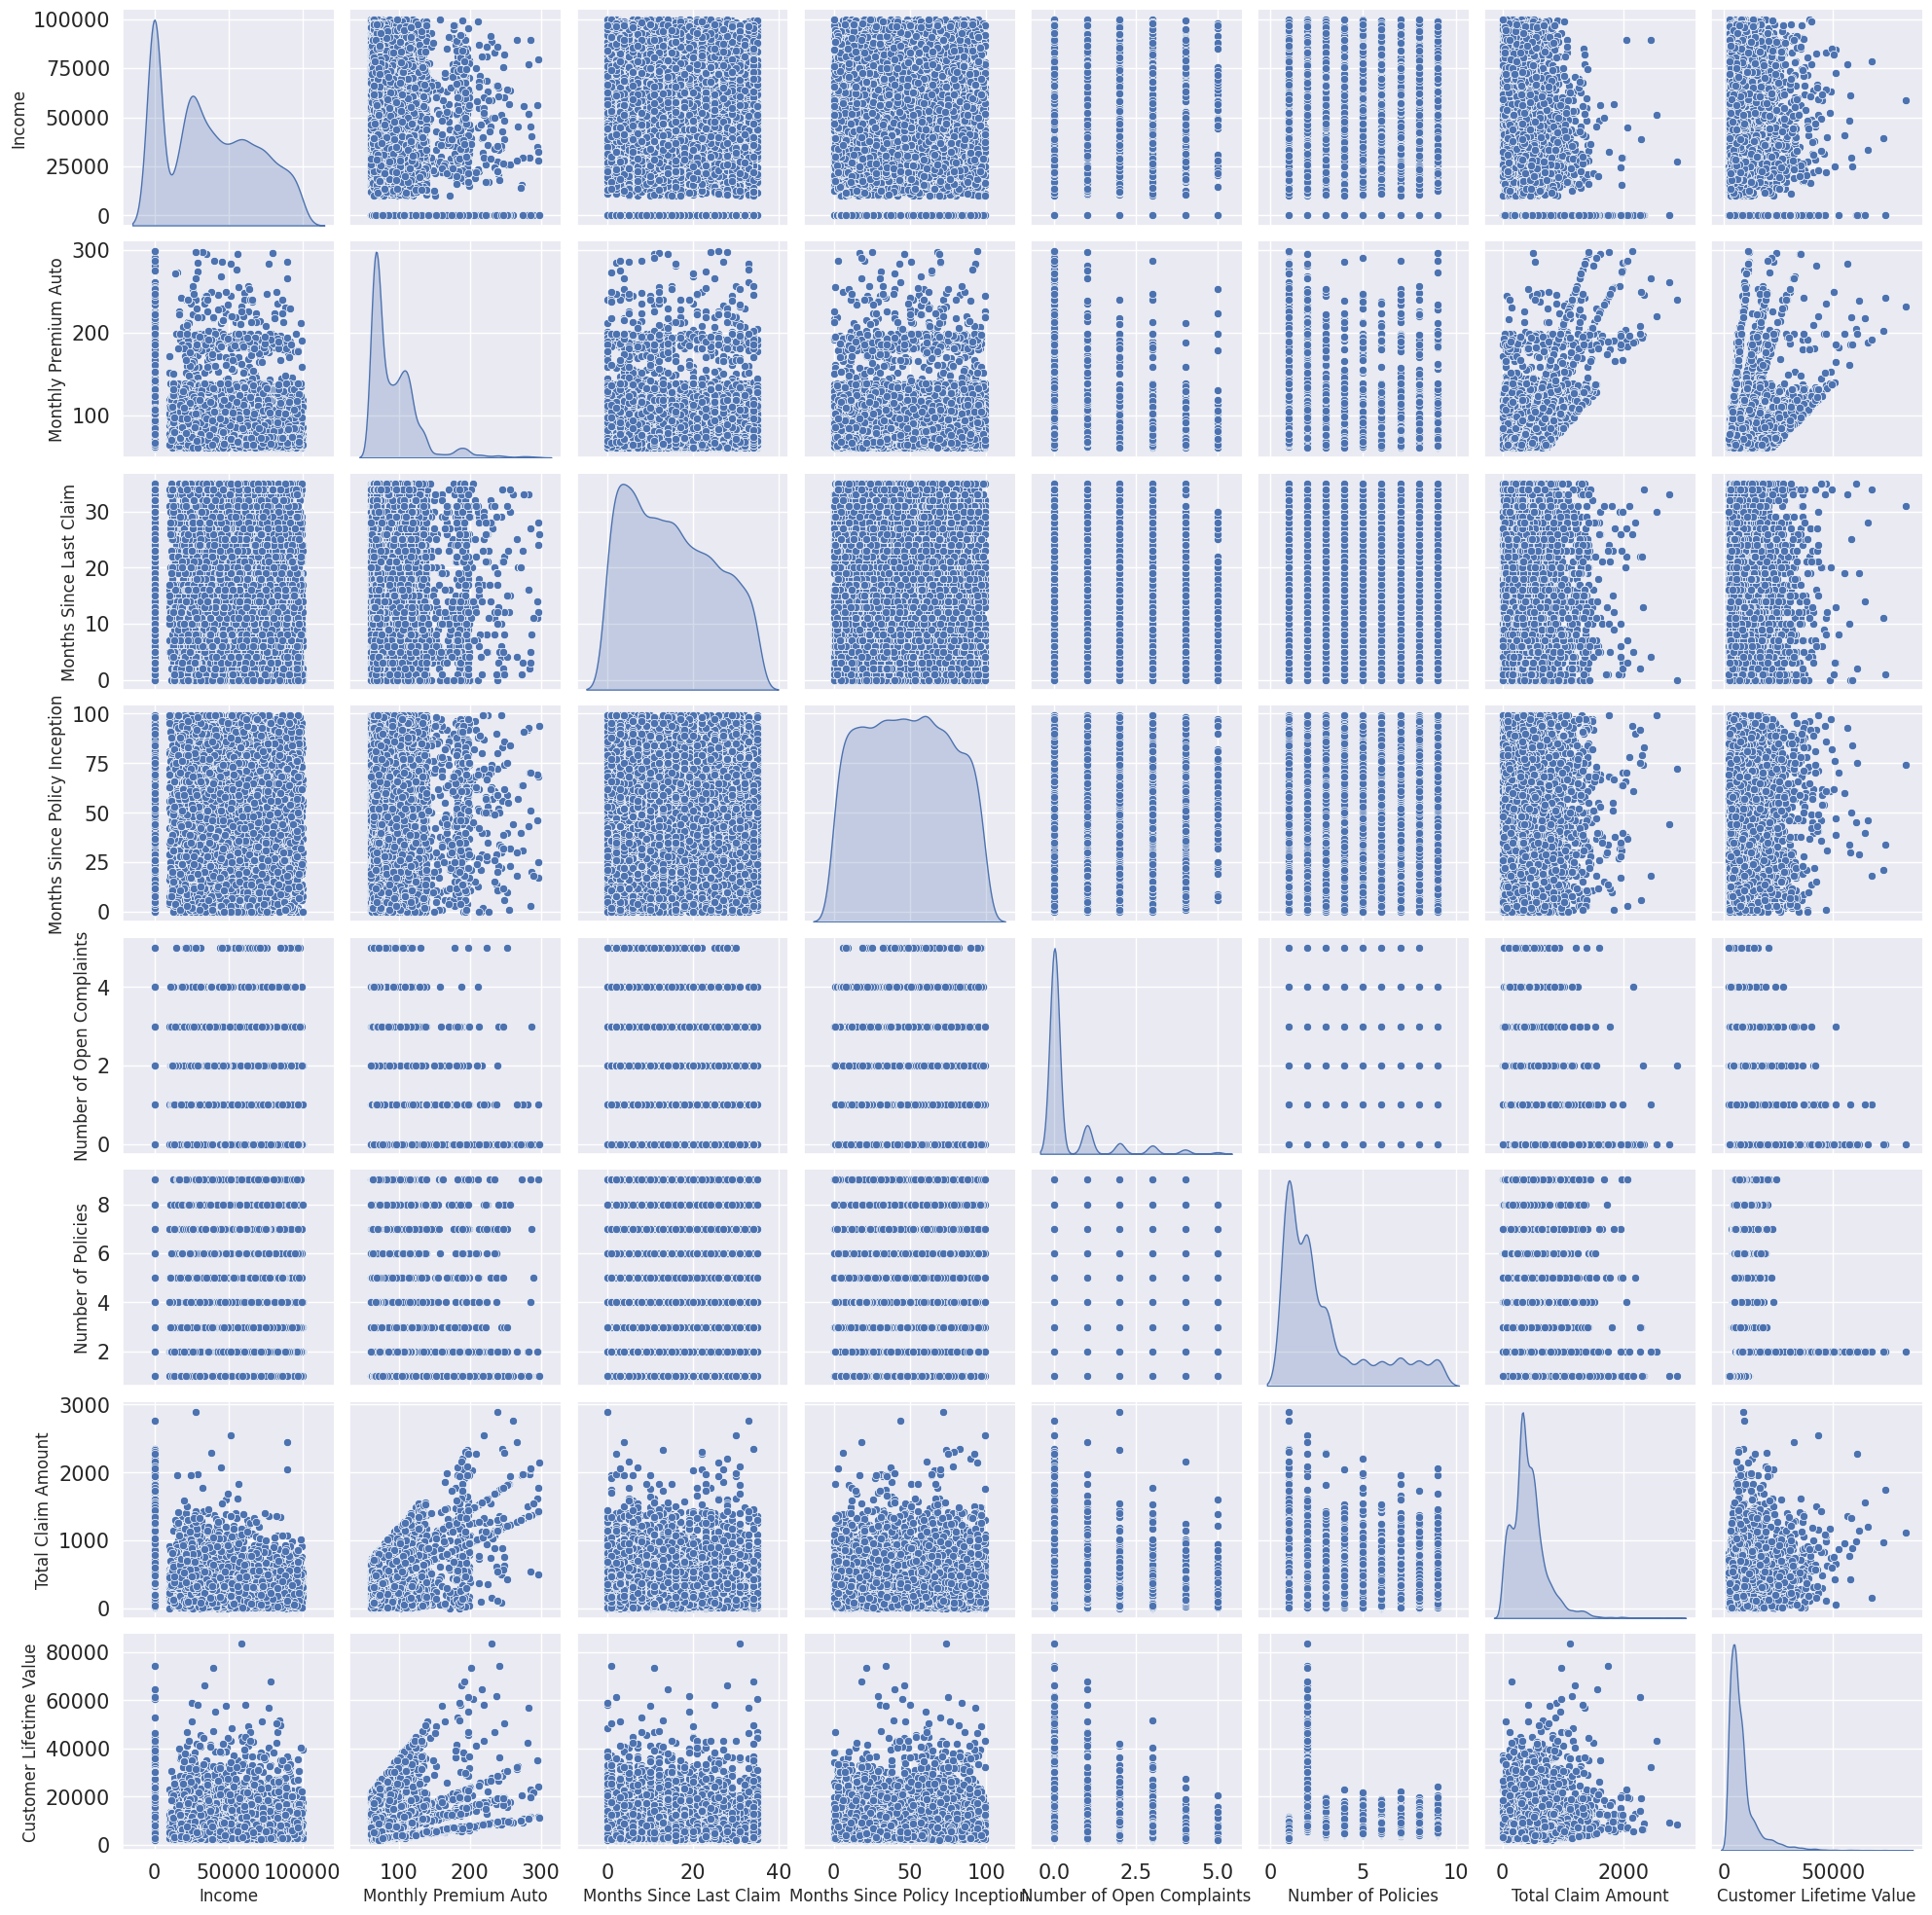

In [ ]:
#Phân tích mối quan hệ giữa các biến
g = sns.pairplot(df, kind ='scatter',diag_kind='kde')
for ax in g.axes.flatten():
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
plt.show()

##Phân tích các biến Non numerical

In [ ]:

non_num_cols= df.select_dtypes('object').columns
df[non_num_cols].describe().T

,count,unique,top,freq
State,9134,5,California,3150
Response,9134,2,No,7826
Coverage,9134,3,Basic,5568
Education,9134,5,Bachelor,2748
EmploymentStatus,9134,5,Employed,5698
Gender,9134,2,F,4658
Location Code,9134,3,Suburban,5779
Marital Status,9134,3,Married,5298
Policy Type,9134,3,Personal Auto,6788
Policy,9134,9,Personal L3,3426


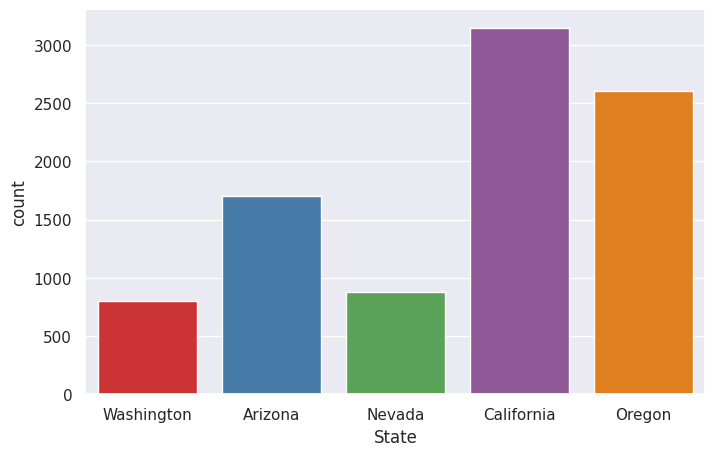

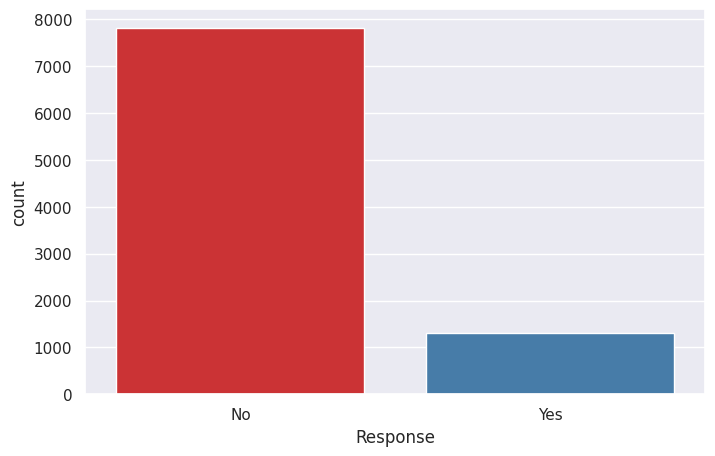

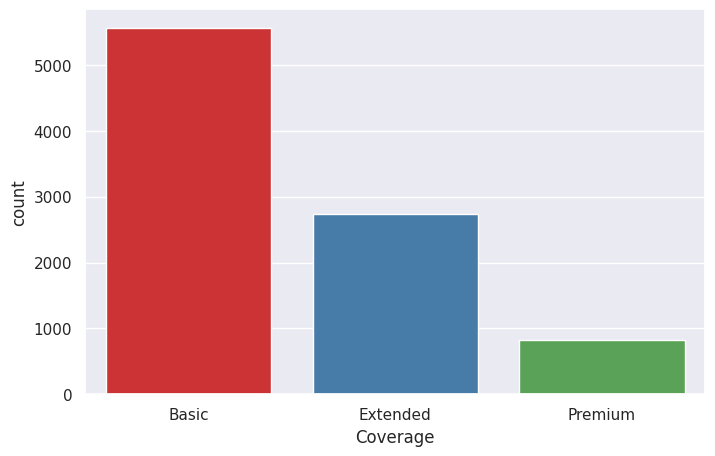

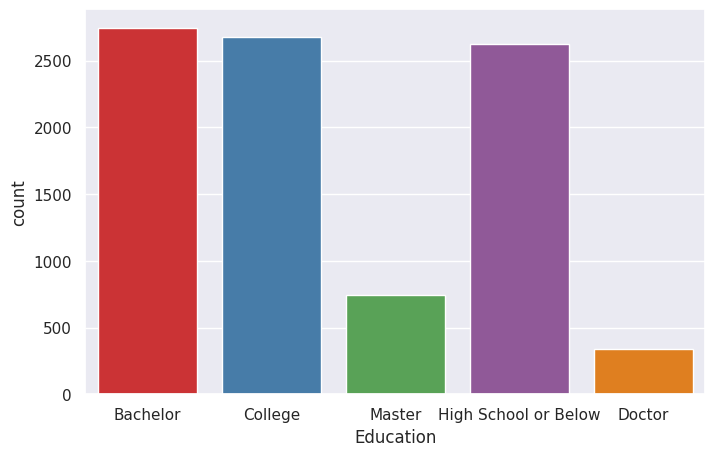

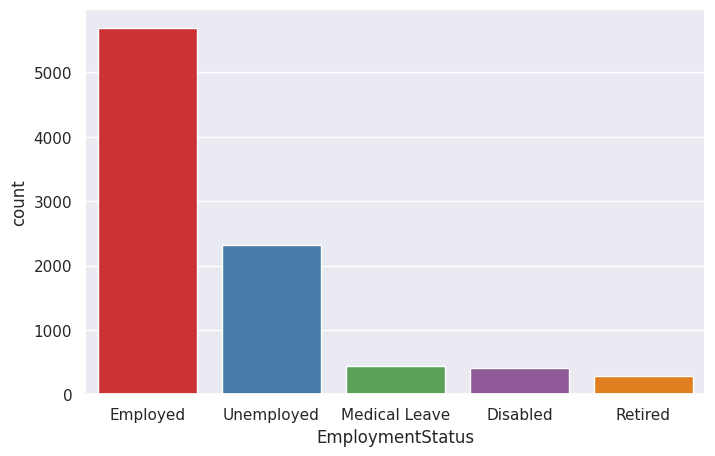

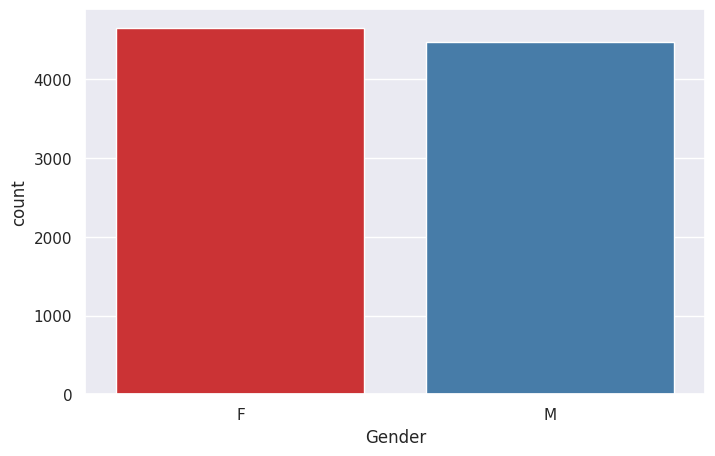

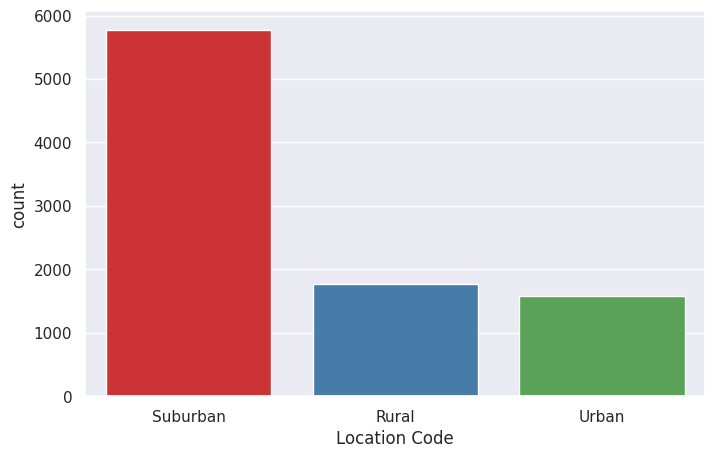

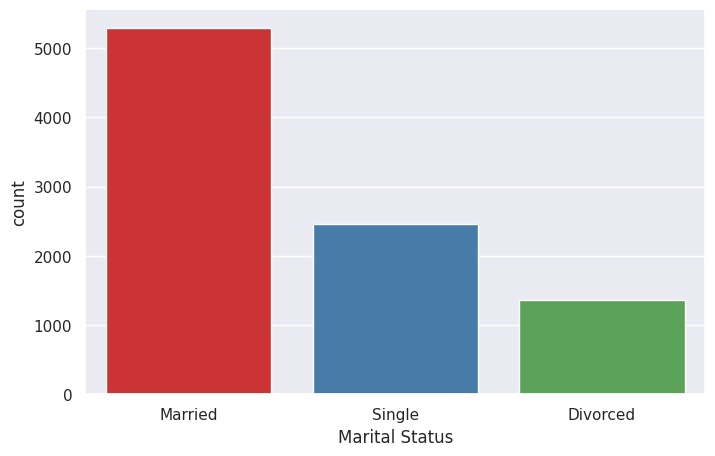

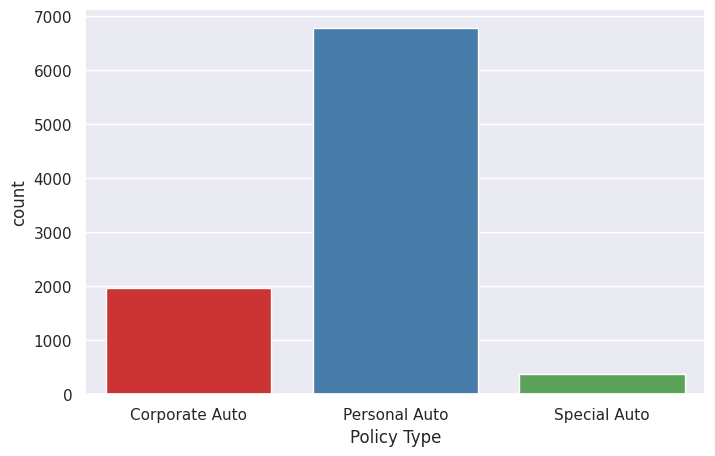

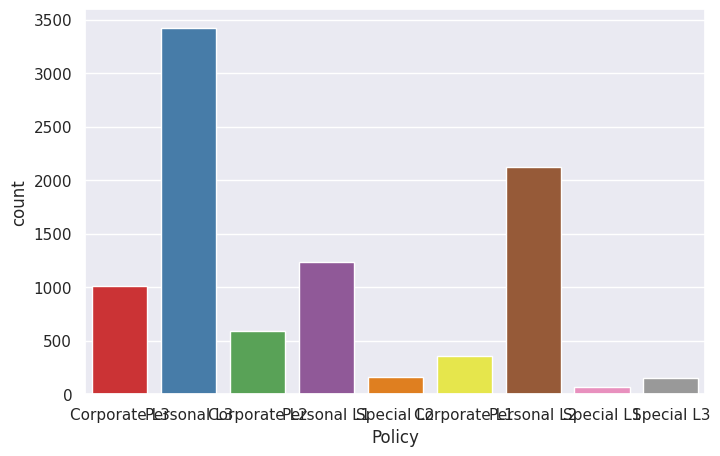

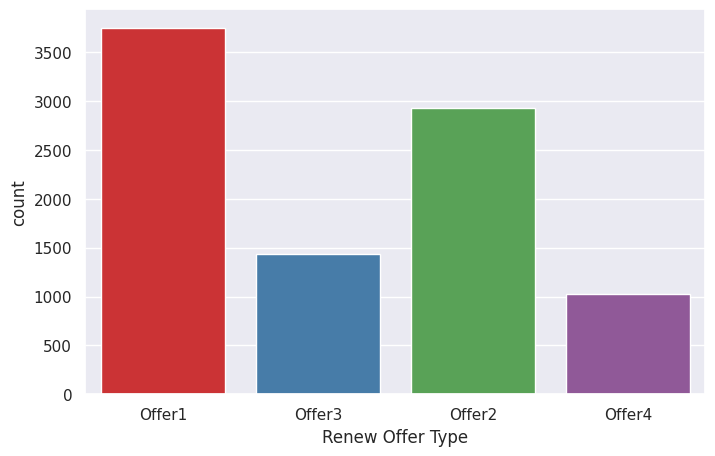

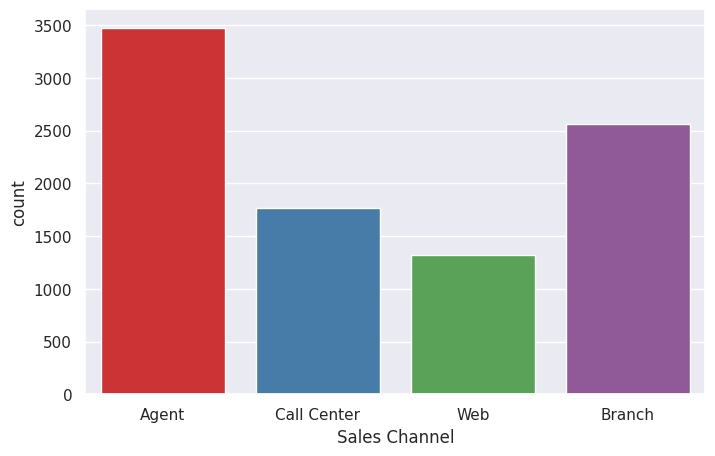

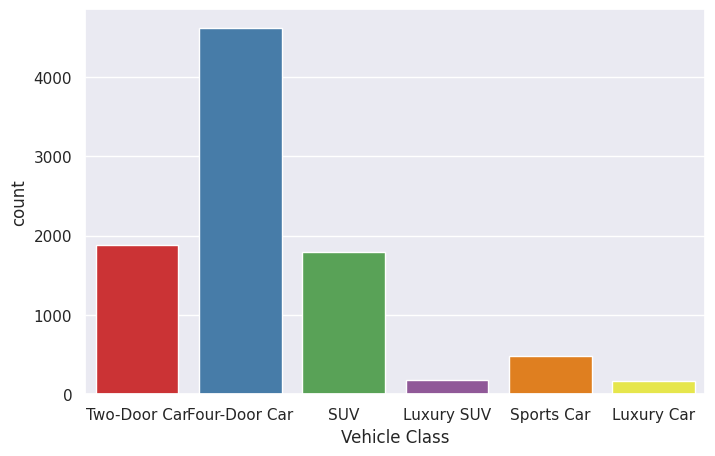

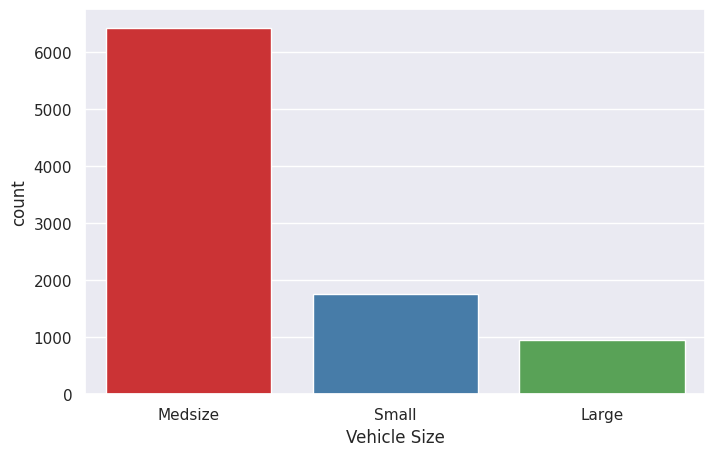

In [ ]:
# Phân tích từng cột:

for col in non_num_cols:
  plt.figure(figsize=(8,5))
  sns.countplot(x=df[col], data= df, palette='Set1')
  plt.show()

In [ ]:
non_num_cols

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [ ]:
for col in non_num_cols:

 print(col, ': ', len(df[col].unique()), ' labels')

State :  5  labels
Response :  2  labels
Coverage :  3  labels
Education :  5  labels
EmploymentStatus :  5  labels
Gender :  2  labels
Location Code :  3  labels
Marital Status :  3  labels
Policy Type :  3  labels
Policy :  9  labels
Renew Offer Type :  4  labels
Sales Channel :  4  labels
Vehicle Class :  6  labels
Vehicle Size :  3  labels


In [ ]:
df_non_num= df[non_num_cols].copy()
lb= LabelEncoder()

In [ ]:

df_non_num1= df[non_num_cols].copy()
lb= LabelEncoder()
#One-hot-encoding cho các biến < 5 labels:
for col in non_num_cols:
  if df_non_num1[col].nunique() < 5:
        prefix = col + '_'
        df_non_num1= pd.concat([df_non_num1, pd.get_dummies(df_non_num1[col], prefix=col)], axis=1)
df_non_num1.drop(non_num_cols, axis=1, inplace=True)

# Labelencoder cho các biến >5 label

df_non_num2=df_non_num[[col for col in df_non_num.columns if df_non_num[col].nunique() >= 5]]
for col in df_non_num2.columns:
    df_non_num2[col]=lb.fit_transform(df_non_num[col])

df_non_num=pd.concat([df_non_num2,df_non_num1], axis=1)
df_non_num

<ipython-input-60-5a2ee0650404>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_num2[col]=lb.fit_transform(df_non_num[col])
<ipython-input-60-5a2ee0650404>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_num2[col]=lb.fit_transform(df_non_num[col])
<ipython-input-60-5a2ee0650404>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,State,Education,EmploymentStatus,Policy,Vehicle Class,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,...,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,4,0,1,2,5,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,4,5,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,2,0,1,5,5,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,1,0,4,1,3,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,4,0,1,3,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,1,3,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
9130,1,1,1,2,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
9131,1,0,4,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
9132,1,1,1,4,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
df_num=df[num_cols]
df= pd.concat([df_non_num,df_num],axis=1)
df

,State,Education,EmploymentStatus,Policy,Vehicle Class,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,...,Vehicle Size_Medsize,Vehicle Size_Small,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer Lifetime Value
0,4,0,1,2,5,1,0,1,0,0,...,1,0,56274,69,32,5,0,1,384.811147,2763.519279
1,0,0,4,5,0,1,0,0,1,0,...,1,0,0,94,13,42,0,8,1131.464935,6979.535903
2,2,0,1,5,5,1,0,0,0,1,...,1,0,48767,108,18,38,0,2,566.472247,12887.431650
3,1,0,4,1,3,1,0,1,0,0,...,1,0,0,106,18,65,0,7,529.881344,7645.861827
4,4,0,1,3,0,1,0,1,0,0,...,1,0,43836,73,12,44,0,1,138.130879,2813.692575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,1,3,0,1,0,1,0,0,...,1,0,71941,73,18,89,0,2,198.234764,23405.987980
9130,1,1,1,2,0,0,1,0,1,0,...,1,0,21604,79,14,28,0,1,379.200000,3096.511217
9131,1,0,4,1,0,1,0,0,1,0,...,1,0,0,85,9,37,3,2,790.784983,8163.890428
9132,1,1,1,4,0,1,0,0,1,0,...,0,0,21941,96,34,3,0,3,691.200000,7524.442436


In [ ]:
# Loại bỏ các cột có phương sai nhỏ hơn 0.05 vì không ảnh hưởng nhiều đến mô hình
drop_cols= [col for col in df.columns if np.var(df[col])<0.05]
df= df.drop(df[drop_cols],axis =1)
df

,State,Education,EmploymentStatus,Policy,Vehicle Class,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,...,Vehicle Size_Medsize,Vehicle Size_Small,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer Lifetime Value
0,4,0,1,2,5,1,0,1,0,0,...,1,0,56274,69,32,5,0,1,384.811147,2763.519279
1,0,0,4,5,0,1,0,0,1,0,...,1,0,0,94,13,42,0,8,1131.464935,6979.535903
2,2,0,1,5,5,1,0,0,0,1,...,1,0,48767,108,18,38,0,2,566.472247,12887.431650
3,1,0,4,1,3,1,0,1,0,0,...,1,0,0,106,18,65,0,7,529.881344,7645.861827
4,4,0,1,3,0,1,0,1,0,0,...,1,0,43836,73,12,44,0,1,138.130879,2813.692575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,1,3,0,1,0,1,0,0,...,1,0,71941,73,18,89,0,2,198.234764,23405.987980
9130,1,1,1,2,0,0,1,0,1,0,...,1,0,21604,79,14,28,0,1,379.200000,3096.511217
9131,1,0,4,1,0,1,0,0,1,0,...,1,0,0,85,9,37,3,2,790.784983,8163.890428
9132,1,1,1,4,0,1,0,0,1,0,...,0,0,21941,96,34,3,0,3,691.200000,7524.442436


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   int64  
 1   Education                      9134 non-null   int64  
 2   EmploymentStatus               9134 non-null   int64  
 3   Policy                         9134 non-null   int64  
 4   Vehicle Class                  9134 non-null   int64  
 5   Response_No                    9134 non-null   uint8  
 6   Response_Yes                   9134 non-null   uint8  
 7   Coverage_Basic                 9134 non-null   uint8  
 8   Coverage_Extended              9134 non-null   uint8  
 9   Coverage_Premium               9134 non-null   uint8  
 10  Gender_F                       9134 non-null   uint8  
 11  Gender_M                       9134 non-null   uint8  
 12  Location Code_Rural            9134 non-null   u

In [ ]:
df_no_stand=df.copy()


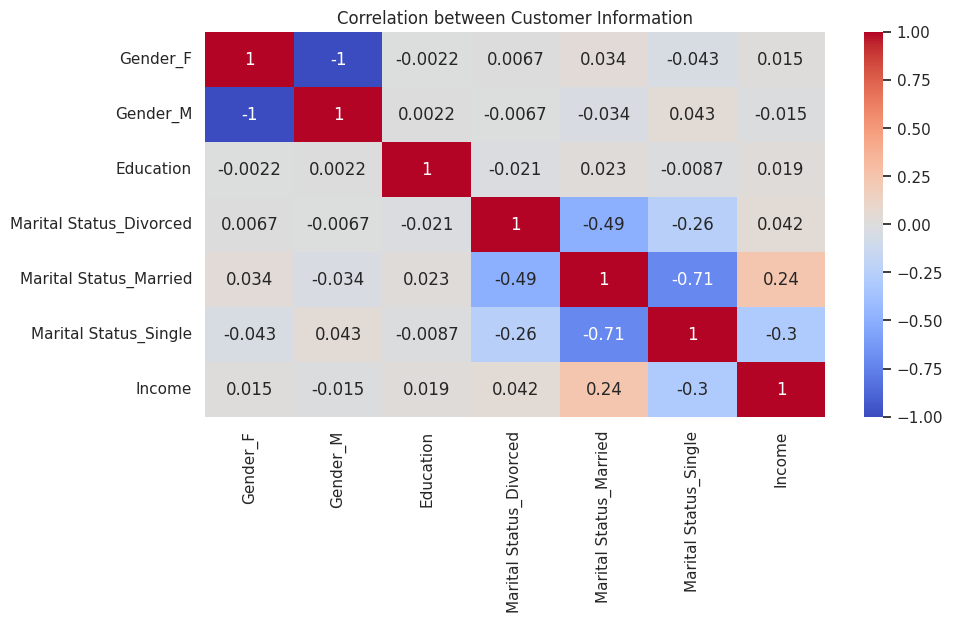

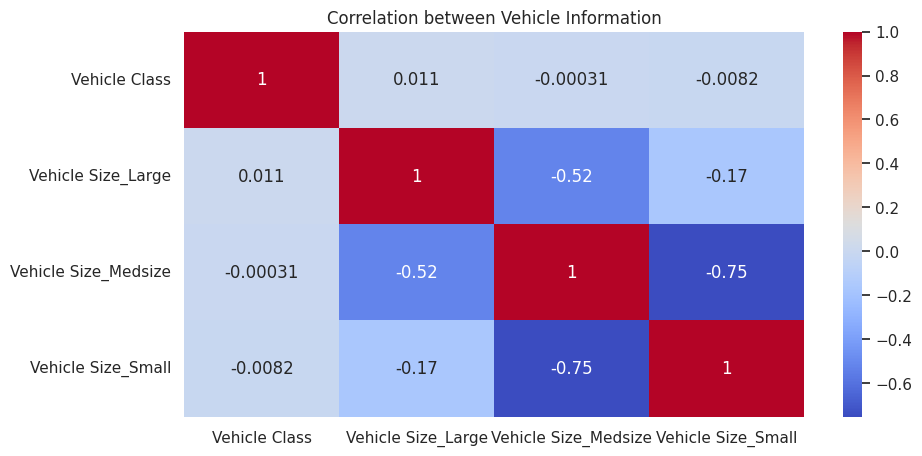

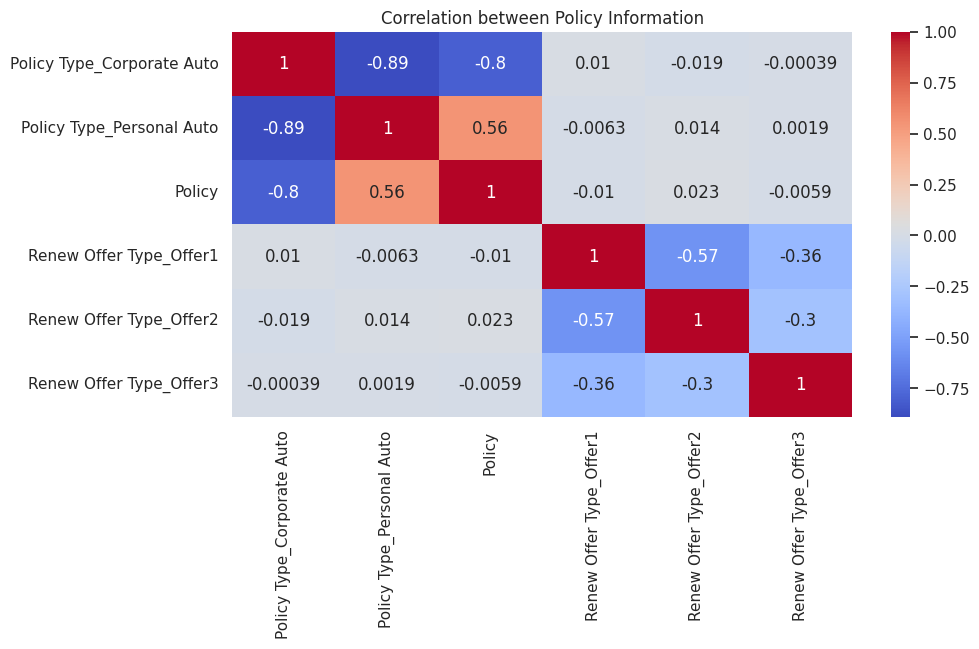

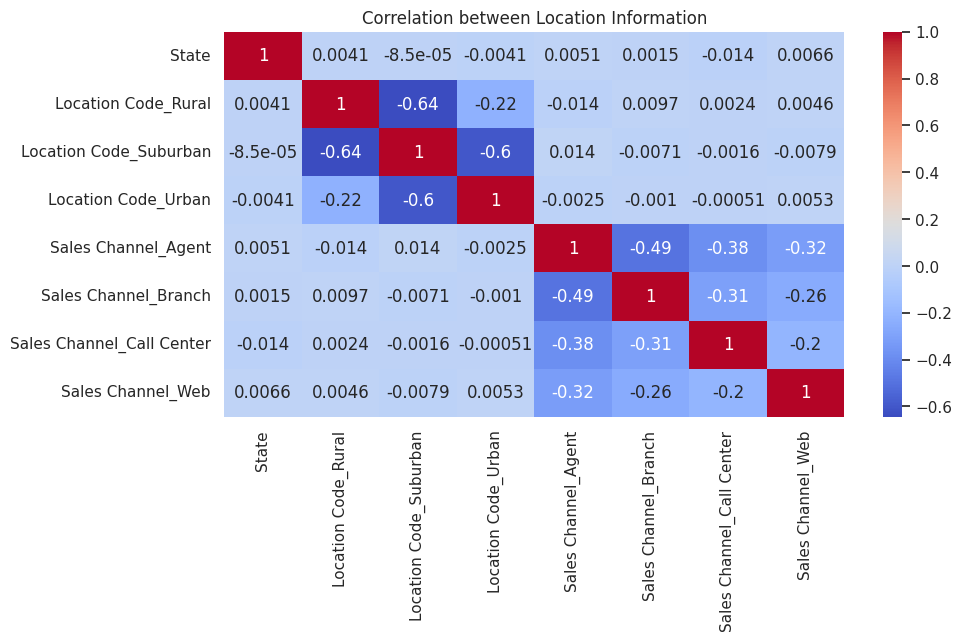

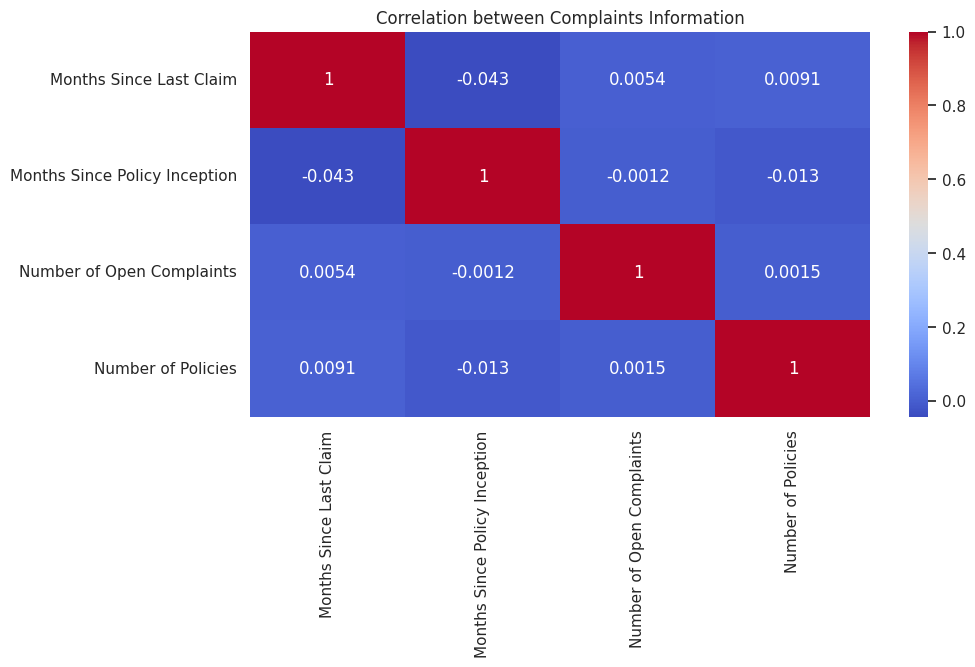

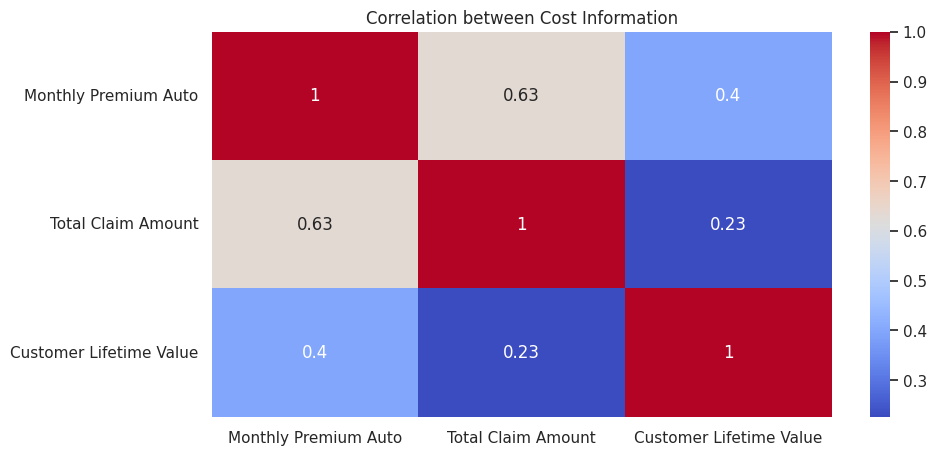

In [ ]:
# Chia các cột thành từng nhóm để phân tích tương quan
customer_info = df[['Gender_F', 'Gender_M',  'Education',  'Marital Status_Divorced', 'Marital Status_Married','Marital Status_Single', 'Income']]
vehicle_info = df[['Vehicle Class', 'Vehicle Size_Large', 'Vehicle Size_Medsize','Vehicle Size_Small']]
policy_info = df[['Policy Type_Corporate Auto','Policy Type_Personal Auto', 'Policy', 'Renew Offer Type_Offer1','Renew Offer Type_Offer2', 'Renew Offer Type_Offer3']]
location_info = df[['State','Location Code_Rural','Location Code_Suburban', 'Location Code_Urban', 'Sales Channel_Agent','Sales Channel_Branch', 'Sales Channel_Call Center','Sales Channel_Web']]
complaints_info = df[['Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies']]
cost_info = df[['Monthly Premium Auto', 'Total Claim Amount', 'Customer Lifetime Value']]

# Vẽ biểu đồ tương quan giữa các nhóm
sns.heatmap(customer_info.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Customer Information')
plt.show()

sns.heatmap(vehicle_info.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Vehicle Information')
plt.show()

sns.heatmap(policy_info.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Policy Information')
plt.show()

sns.heatmap(location_info.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Location Information')
plt.show()

sns.heatmap(complaints_info.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Complaints Information')
plt.show()

sns.heatmap(cost_info.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Cost Information')
plt.show()



In [ ]:
df

,State,Education,EmploymentStatus,Policy,Vehicle Class,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,...,Vehicle Size_Medsize,Vehicle Size_Small,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer Lifetime Value
0,4,0,1,2,5,1,0,1,0,0,...,1,0,56274,69,32,5,0,1,384.811147,2763.519279
1,0,0,4,5,0,1,0,0,1,0,...,1,0,0,94,13,42,0,8,1131.464935,6979.535903
2,2,0,1,5,5,1,0,0,0,1,...,1,0,48767,108,18,38,0,2,566.472247,12887.431650
3,1,0,4,1,3,1,0,1,0,0,...,1,0,0,106,18,65,0,7,529.881344,7645.861827
4,4,0,1,3,0,1,0,1,0,0,...,1,0,43836,73,12,44,0,1,138.130879,2813.692575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,1,3,0,1,0,1,0,0,...,1,0,71941,73,18,89,0,2,198.234764,23405.987980
9130,1,1,1,2,0,0,1,0,1,0,...,1,0,21604,79,14,28,0,1,379.200000,3096.511217
9131,1,0,4,1,0,1,0,0,1,0,...,1,0,0,85,9,37,3,2,790.784983,8163.890428
9132,1,1,1,4,0,1,0,0,1,0,...,0,0,21941,96,34,3,0,3,691.200000,7524.442436


# Split dataset into training / testing sets

In [ ]:
X= df.drop('Customer Lifetime Value', axis = 1)
Y = df['Customer Lifetime Value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state=42)

In [ ]:
#Chuẩn hóa dữ liệu

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler trên tập train và transform tập train và test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))


##Mô hình Polynomial


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train_scaled)
X_poly_test = poly.transform(X_test_scaled)
model_poly = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {}
score = []

my_model_poly = GridSearchCV(model_poly, param_grid, cv=kf)
my_model_poly.fit(X_poly_train, y_train_scaled)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LinearRegression(), param_grid={})

##Mô hình Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
model_rf = RandomForestRegressor(random_state=0)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {}
score = []
my_model_rf= GridSearchCV(model_rf,param_grid,cv=kf)
my_model_rf.fit(X_train_scaled, y_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=0), param_grid={})

##Mô hình Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
model_gbm= GradientBoostingRegressor()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {}
score = []
my_model_gbm= GridSearchCV(model_gbm,param_grid,cv=kf)
my_model_gbm.fit(X_train_scaled, y_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingRegressor(), param_grid={})

#Evaluation


###Polynomial

In [ ]:
# Dự đoán giá trị trên tập kiểm tra
y_pred_poly = my_model_poly.predict(X_poly_test)

r2 = r2_score(y_test_scaled, y_pred_poly)
mse = mean_squared_error(y_test_scaled, y_pred_poly)
mae = mean_absolute_error(y_test_scaled, y_pred_poly)
rmse = mean_squared_error(y_test_scaled, y_pred_poly, squared=False)


print(f"R-squared: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

Model_name = " Poly"
metric_poly= pd.DataFrame(columns=['Model', 'R2', 'MSE', 'MAE', 'RMSE'])
metric_poly= metric_poly.append({'Model':Model_name, 'R2':r2, 'MSE':mse,'MAE':mae,'RMSE':rmse},ignore_index=True)
metric_poly

R-squared: 0.1923994691728682
MSE: 0.0062772247132169764
MAE: 0.04898468667593752
RMSE: 0.07922893860968337


<ipython-input-77-a51346ac3b68>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_poly= metric_poly.append({'Model':Model_name, 'R2':r2, 'MSE':mse,'MAE':mae,'RMSE':rmse},ignore_index=True)


,Model,R2,MSE,MAE,RMSE
0,Poly,0.192399,0.006277,0.048985,0.079229


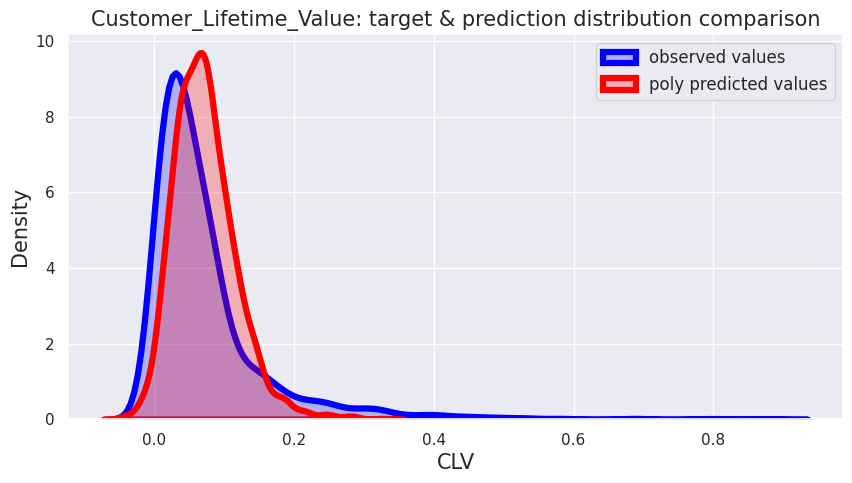

In [ ]:
sns.set( rc = {'figure.figsize': (10, 5)})
fig,ax = plt.subplots(1, 1)
sns.kdeplot(x=y_test_scaled.ravel(), fill=True, linewidth=4.5, color="blue",label="observed values",)
sns.kdeplot(x=y_pred_poly.ravel(), fill=True, linewidth=4.5, color="red",label='poly predicted values')
plt.title('Customer_Lifetime_Value: target & prediction distribution comparison', fontsize=15)
plt.xlabel('CLV', fontsize=15)
plt.ylabel('Density', fontsize=15)
ax.legend(fontsize=12)
plt.show()

##Random forest

In [ ]:
y_pred_rf = my_model_rf.predict(X_test_scaled)
r2 = r2_score(y_test_scaled, y_pred_rf)
mse = mean_squared_error(y_test_scaled, y_pred_rf)
mae = mean_absolute_error(y_test_scaled, y_pred_rf)
rmse = mean_squared_error(y_test_scaled, y_pred_rf, squared=False)


print(f"R-squared: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

Model_name = " Random Forest"
metric_rf= pd.DataFrame(columns=['Model', 'R2', 'MSE', 'MAE', 'RMSE'])
metric_rf= metric_rf.append({'Model':Model_name, 'R2':r2, 'MSE':mse,'MAE':mae,'RMSE':rmse},ignore_index=True)
metric_rf

R-squared: 0.6914591196520927
MSE: 0.002398191141818574
MAE: 0.01819798192343965
RMSE: 0.04897132979426405


<ipython-input-79-84643b021ed6>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_rf= metric_rf.append({'Model':Model_name, 'R2':r2, 'MSE':mse,'MAE':mae,'RMSE':rmse},ignore_index=True)


,Model,R2,MSE,MAE,RMSE
0,Random Forest,0.691459,0.002398,0.018198,0.048971


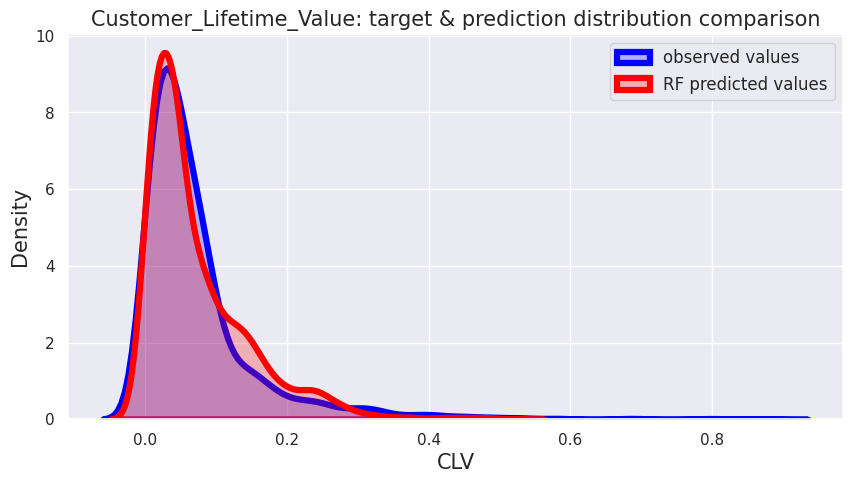

In [ ]:
sns.set( rc = {'figure.figsize': (10, 5)})
fig,ax = plt.subplots(1, 1)
sns.kdeplot(x=y_test_scaled.ravel(), fill=True, linewidth=4.5, color="blue",label="observed values",)
sns.kdeplot(x=y_pred_rf.ravel(), fill=True, linewidth=4.5, color="red",label='RF predicted values')
plt.title('Customer_Lifetime_Value: target & prediction distribution comparison', fontsize=15)
plt.xlabel('CLV', fontsize=15)
plt.ylabel('Density', fontsize=15)
ax.legend(fontsize=12)

plt.show()

##Gradient Boosting##

In [ ]:
y_pred_gbm = my_model_gbm.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred_gbm)
mae = mean_absolute_error(y_test_scaled, y_pred_gbm)
rmse = mean_squared_error(y_test_scaled, y_pred_gbm, squared=False)
print(f"R-squared: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


Model_name = " GBM"
metric_gbm= pd.DataFrame(columns=['Model', 'R2', 'MSE', 'MAE', 'RMSE'])
metric_gbm= metric_gbm.append({'Model':Model_name, 'R2':r2, 'MSE':mse,'MAE':mae,'RMSE':rmse},ignore_index=True)
metric_gbm

R-squared: 0.6914591196520927
MSE: 0.0025934110789689506
MAE: 0.021578494975419377
RMSE: 0.05092554446413853


<ipython-input-81-5a8679bb5d76>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_gbm= metric_gbm.append({'Model':Model_name, 'R2':r2, 'MSE':mse,'MAE':mae,'RMSE':rmse},ignore_index=True)


,Model,R2,MSE,MAE,RMSE
0,GBM,0.691459,0.002593,0.021578,0.050926


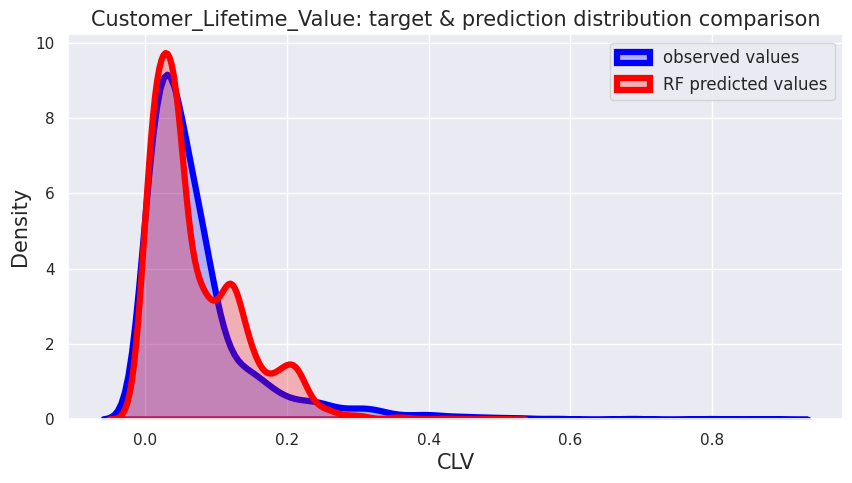

In [ ]:
sns.set( rc = {'figure.figsize': (10, 5)})
fig,ax = plt.subplots(1, 1)
sns.kdeplot(x=y_test_scaled.ravel(), fill=True, linewidth=4.5, color="blue",label="observed values",)
sns.kdeplot(x=y_pred_gbm.ravel(), fill=True, linewidth=4.5, color="red",label='RF predicted values')
plt.title('Customer_Lifetime_Value: target & prediction distribution comparison', fontsize=15)
plt.xlabel('CLV', fontsize=15)
plt.ylabel('Density', fontsize=15)
ax.legend(fontsize=12)
plt.show()

In [ ]:
metric_model  = pd.concat([metric_poly,metric_rf,metric_gbm]).reset_index(drop=True)
metric_model

,Model,R2,MSE,MAE,RMSE
0,Poly,0.192399,0.006277,0.048985,0.079229
1,Random Forest,0.691459,0.002398,0.018198,0.048971
2,GBM,0.691459,0.002593,0.021578,0.050926


In [ ]:
# Dựa vào các chỉ số ở trên thì có thể thấy mô hình Random forest có khả năng dự báo tốt nhất


#Đánh giá sự ảnh hưởng của các Feature

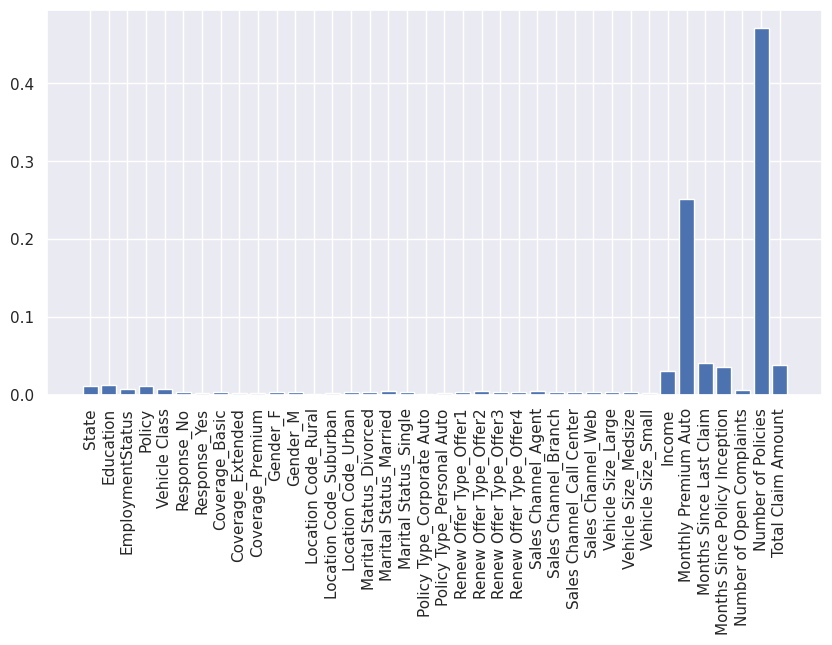

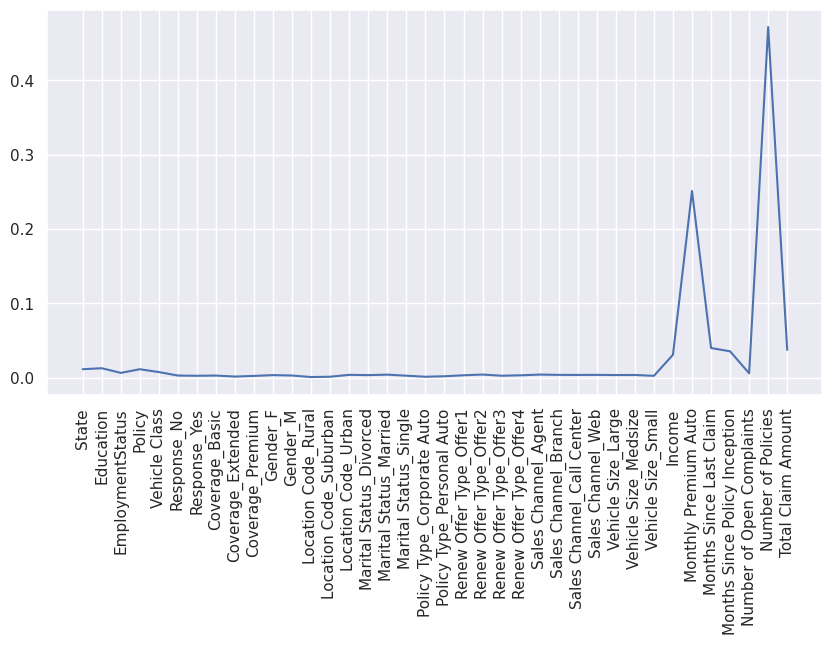

In [ ]:

# Tính toán độ quan trọng của các biến đầu vào
importances = my_model_rf.best_estimator_.feature_importances_

# Trực quan hóa độ quan trọng của các biến đầu vào bằng biểu đồ cột
plt.bar(df.columns[:-1], importances)
plt.xticks(rotation=90)
plt.show()

# Trực quan hóa độ quan trọng của các biến đầu vào bằng biểu đồ đường
plt.plot(df.columns[:-1], importances)
plt.xticks(rotation=90)
plt.show()